<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Generating-the-Submission-File" data-toc-modified-id="Generating-the-Submission-File-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Generating the Submission File</a></span><ul class="toc-item"><li><span><a href="#Creating-the-directory-for-the-submission-file" data-toc-modified-id="Creating-the-directory-for-the-submission-file-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Creating the directory for the submission file</a></span></li><li><span><a href="#Generating-the-submission-file" data-toc-modified-id="Generating-the-submission-file-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Generating the submission file</a></span></li></ul></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>

<p>
<center>
<font size="4">
Part 2, Chapter 2, Section 4: Shallow Neural Networks
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Homework 2
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Yuxiao Huang
</font>
</center>
</p>
</b>

# Overview

- This notebook includes homework 2 for Shallow Neural Networks (Part 2, Chapter 2, Section 4).
- See the accompanied slides in our [github repository](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/fall_2022/slides/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s4_shallow_neural_networks).
- Here we will work on kaggle competation [Santander Customer Transaction Prediction].(https://www.kaggle.com/c/santander-customer-transaction-prediction/overview)
- The goal of this homework is tweaking the pipeline (including data preprocessing, hyperparameter tuning and model selection) implemented in [/p2 c2 s4 shallow neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/fall_2022/code/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s4_shallow_neural_networks/case_study/case_study.ipynb) to make it work for the new kaggle competation mentioned above.
- Complete the missing parts indicated by # Implement me.
- Particularly, the code should
    - be bug-free (note that the output produced by your solution may not necessarily be the same as the provided output, due to version issues)
    - be commented
- **The baseline for this assignment is 0.670522. As per the grading rubrics (section 15 of the syllabus), if the validation score of your best model is lower than or the same as the baseline, you will only receive 80% of the full mark. See more details in the grading rubrics.**
- Submit an ipynb file named homework_2.ipynb to [blackboard](https://blackboard.gwu.edu) folder /Assignments/Homework_2/.

# Notebook Configuration

## Google drive

In [1]:
# from google.colab import drive
import sys

# Mount Google Drive
# drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = ''

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = ''

# Get the absolute path of the shallow models folder
abspath_model_shallow = ''

## Warning

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [101]:
# The magic below allows us to use tensorflow version 2.x
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH']='true'
# %tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2060, compute capability 7.5


2022-10-14 15:53:59.715691: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-14 15:53:59.749590: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-14 15:53:59.749942: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-14 15:53:59.751611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.


## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

## Import utilities notebook

In [6]:
# Change working directory to the absolute path of the shallow utilities folder
# %cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

## Load data

In [16]:
import pandas as pd

df_raw_train = pd.read_csv(abspath_curr + 'data/train.csv', header=0)
df_train = df_raw_train.copy(deep=True)

df_raw_test = pd.read_csv(abspath_curr + 'data/test.csv', header=0)
df_test = df_raw_test.copy(deep=True)

target = 'target'

In [17]:
# Print the dimension of df_train
pd.DataFrame({'Training':{'Instances':df_train.shape[0], 'Features':df_train.shape[1]},
              'Testing':{'Instances':df_test.shape[0], 'Features':df_test.shape[1]}}).T

,Instances,Features
Training,200000,202
Testing,200000,201


### Glimpse of the dataset

In [18]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## Splitting the data

In [21]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

# Print the dimension of df_train
pd.DataFrame({'Training':{'Instances':df_train.shape[0], 'Features':df_train.shape[1]},
              'Testing':{'Instances':df_test.shape[0], 'Features':df_test.shape[1]}}).T

,Instances,Features
Training,128000,202
Testing,200000,201


## Handling uncommon features

In [41]:
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
# df_common_var

In [42]:
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
if len(uncommon_feature_train_not_val_test) > 0:
    print(f'Training:\n{pd.DataFrame(uncommon_feature_train_not_val_test, columns=["uncommon feature"])}')
    df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

if len(uncommon_feature_val_not_train_test) > 0:
    print(f'Validation:\n\n{pd.DataFrame(uncommon_feature_val_not_train_test, columns=["uncommon feature"])}')
    df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)
    
if len(uncommon_feature_test_not_train_val) > 0:
    print(f'Testing:\n\n{pd.DataFrame(uncommon_feature_test_not_train_val, columns=["uncommon feature"])}')
    df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

## Handling Identifiers

### Retrieve the identifier columns and have them removed from all subsets

In [45]:
df = pd.concat([df_train, df_val, df_test], sort=False)
df_id = id_checker(df)

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)
# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)
# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

##### Note: At this stage only the subsets have the up to date copy, not the combined df

## DateTime Transformation

In [46]:
df_train.dtypes[df_train.dtypes != 'float64']

target    int64
dtype: object

#### This step is ignored as it appears that there exist no date time attributes

## Identify and impute the missing data

#### It is wise to combine the subsets here once again as only the subsets are up to date after the identifier removal step

In [48]:
df = pd.concat([df_train, df_val, df_test], sort=False)
df_nan = nan_checker(df)
df_nan

,var,proportion,dtype
0,target,0.555556,float64


#### Since the data in the df is not shuffled, the subsets should remain in their respective position that we can access them with the aid of subset's size. Perhaps we can use the train set to estimate the statistical parameters of the distribution, and use it to impute the missing values on the other sets

In [49]:
# Segregating the data again
df_train = df.iloc[:df_train.shape[0], :]
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

# Print the dimension of df_train
pd.DataFrame({'Training':{'Instances':df_train.shape[0], 'Features':df_train.shape[1]},
              'Testing':{'Instances':df_test.shape[0], 'Features':df_test.shape[1]},
              'Validation':{'Instances':df_val.shape[0], 'Features':df_val.shape[1]}}).T

,Instances,Features
Training,128000,201
Testing,200000,201
Validation,32000,201


### Define method to impute the data

In [50]:
imputation_method = 'SimpleImputer'

### One way of imputing the data

In [52]:
df_nan

,var,proportion,dtype
0,target,0.555556,float64


In [53]:
from sklearn.impute import SimpleImputer

if imputation_method == 'SimpleImputer':
    # If there are missing values
    if len(df_nan['var']) > 0:
        # The SimpleImputer
        si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

        # Impute the variables with missing values in df_train, df_val and df_test 
        df_train[df_nan['var']] = si.fit_transform(df_train[df_nan['var']])
        df_val[df_nan['var']] = si.transform(df_val[df_nan['var']])
        df_test[df_nan['var']] = si.transform(df_test[df_nan['var']])

### Encoding the data

In [56]:
df.dtypes[df.dtypes != 'float64']

Series([], dtype: object)

In [57]:
cat_var_checker(pd.concat([df_train, df_val, df_test], sort=False))

,var,nunique


In [61]:
df_train['target'].unique()

array([0., 1.])

##### Since there are no categorical variables in the feature set, I wish to ignore this step for the encoding features alone

In [75]:
df = pd.concat([df_train, df_val, df_test], sort=False)
df.loc[:, target] = df[target].astype(str)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Separating the data into subsets - training, validation, and testing
df_train = df.iloc[:df_train.shape[0], :]
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,9.7998,-0.7415,12.1482,8.2571,10.8015,-10.3833,4.6411,13.3124,-5.2028,...,0.2290,8.9102,3.2553,-0.1063,13.8912,0.5565,-2.8737,9.7440,10.7340,0.1405
1,0,16.0944,3.7905,6.4859,6.4650,12.1657,-7.1855,3.7552,17.8214,-4.6494,...,5.0476,13.3845,2.2929,11.9013,18.5858,0.4681,-1.3136,9.4749,18.2472,-3.9705
2,0,9.2505,-7.2534,11.5122,7.7432,13.0477,2.8755,5.5814,12.1331,-5.9097,...,1.0778,10.9874,3.9033,1.9069,15.7846,-0.4838,10.8317,8.3911,21.0170,10.2753
3,0,6.7424,2.7058,12.1081,8.1667,14.1498,5.4268,4.4356,18.3213,1.9536,...,11.2136,10.4883,3.1346,2.6807,15.1756,-0.3347,3.7449,7.7041,19.2023,-7.4910
4,0,12.2137,-3.7251,8.5545,6.5116,12.4416,-8.1108,5.4389,17.1181,2.4588,...,3.1227,11.0152,2.9559,7.6384,15.1356,0.5321,10.5854,8.3476,12.9703,-11.1853


### Integrity check

In [76]:
# Print the dimension of df_train
pd.DataFrame({'Training':{'Instances':df_train.shape[0], 'Features':df_train.shape[1]},
              'Testing':{'Instances':df_test.shape[0], 'Features':df_test.shape[1]},
              'Validation':{'Instances':df_val.shape[0], 'Features':df_val.shape[1]}}).T

,Instances,Features
Training,128000,201
Testing,200000,201
Validation,32000,201


### Splitting the data and transform to Numpy vars

In [78]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

### Scaling the data

In [80]:
df_train.iloc[:, :5].describe() # I set to 5 just to limit bombaring the screen

,target,var_0,var_1,var_2,var_3
count,128000.000000,128000.000000,128000.000000,128000.000000,128000.000000
mean,0.100039,10.685442,-1.627055,10.717486,6.803177
std,0.300053,3.040760,4.045428,2.641408,2.046088
min,0.000000,0.452800,-15.043400,2.117100,-0.040200
25%,0.000000,8.456300,-4.733650,8.725975,5.256600
50%,0.000000,10.534500,-1.598000,10.584850,6.833000
75%,0.000000,12.761300,1.351725,12.520725,8.333500
max,1.000000,20.315000,10.376800,18.652100,12.977300


In [81]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_val = mms.transform(X_val)
X_test = mms.transform(X_test)

In [125]:
tmp_df = pd.DataFrame(np.vstack([X_train, X_val, X_test]))
tmp_df.iloc[:, :5].describe()

,0,1,2,3,4
count,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000
mean,0.514374,0.527833,0.519998,0.501127,0.469416
std,0.152926,0.159081,0.144487,0.144116,0.174491
min,-0.013297,0.000000,-0.085125,-0.037583,-0.025384
25%,0.402639,0.406182,0.415209,0.397924,0.336251
50%,0.506857,0.529006,0.522830,0.503575,0.468195
75%,0.618950,0.644798,0.624700,0.606709,0.604699
max,1.101117,1.000000,1.040533,1.000000,1.024560


#### Comparing the table prior to and after scaling, the first and the second order moment appears to be consistent across the features. Hence the scaling is complete

# Viz

In [121]:
df.shape

(360000, 201)

In [126]:
tmp_df.iloc[:, :5].describe()

,0,1,2,3,4
count,360000.000000,360000.000000,360000.000000,360000.000000,360000.000000
mean,0.514374,0.527833,0.519998,0.501127,0.469416
std,0.152926,0.159081,0.144487,0.144116,0.174491
min,-0.013297,0.000000,-0.085125,-0.037583,-0.025384
25%,0.402639,0.406182,0.415209,0.397924,0.336251
50%,0.506857,0.529006,0.522830,0.503575,0.468195
75%,0.618950,0.644798,0.624700,0.606709,0.604699
max,1.101117,1.000000,1.040533,1.000000,1.024560


In [141]:
tmp_y = np.hstack([y_train, y_val, y_test])

In [144]:
tmp_y.dtype

dtype('int64')

In [148]:
pd.DataFrame({'X':tmp_df.iloc[:, 0], 'Y':tmp_df.iloc[:, 1], 'target':tmp_y}).Y.head()

0    0.562619
1    0.740903
2    0.306449
3    0.698232
4    0.445248
Name: Y, dtype: float64

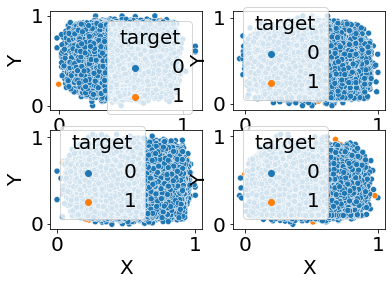

In [150]:
import seaborn as sns

fig, axes = plt.subplots(2, 2)
sns.scatterplot(data=pd.DataFrame({'X':tmp_df.iloc[:, 0], 'Y':tmp_df.iloc[:, 1], 'target':tmp_y}), x='X', y='Y', hue='target', ax=axes[0, 0])
sns.scatterplot(data=pd.DataFrame({'X':tmp_df.iloc[:, 3], 'Y':tmp_df.iloc[:, 4], 'target':tmp_y}), x='X', y='Y', hue='target', ax=axes[0, 1])
sns.scatterplot(data=pd.DataFrame({'X':tmp_df.iloc[:, 1], 'Y':tmp_df.iloc[:, 28], 'target':tmp_y}), x='X', y='Y', hue='target', ax=axes[1, 0])
sns.scatterplot(data=pd.DataFrame({'X':tmp_df.iloc[:, 100], 'Y':tmp_df.iloc[:, 180], 'target':tmp_y}), x='X', y='Y', hue='target', ax=axes[1, 1])
plt.show()

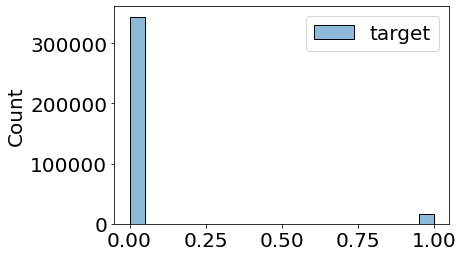

In [152]:
plt.figure()
sns.histplot(pd.DataFrame({'target':tmp_y}))
plt.show()

# Hyperparameter Tuning

##### I need to make some conscious decisions in tuning the hyper-parameters of the FNN model. As you may already know, tuning hyper-parameters such as the number of layers, and the number of neurons in a network is an expensive process.

In [95]:
X_train.shape

(128000, 200)

In [102]:
es_callback = tf.keras.callbacks.EarlyStopping(
                                                monitor='val_loss',
                                                min_delta=1e-3,
                                                patience=5,
                                                verbose=1,
                                                mode='min',
                                                baseline=None,
                                                restore_best_weights=True # This should be expensive
                                               )

### Terminate on NaN

In [103]:
terminate_on_nan = tf.keras.callbacks.TerminateOnNaN()

### Optimizer

In [104]:
optimizer = tf.keras.optimizers.Adadelta(name='Adadelta')

### TensorFlow

In [120]:
n_classes = len(df.target.unique())
print(f'Total number of classes in the target: {n_classes}')

Total number of classes in the target: 2


#### Data Generator for SGD

In [117]:
def sgd_dgen(X):
    i = 0
    while i < X.shape[0]:
        idx = np.random.randint(low=0, high=X.shape[0], size=1)
        yield X[idx+1, :] # +1 was written to make it return a matrix instead of a vector
        i += 1

In [105]:
layers_grid = [1, 2, 3]
neurons_grid = [64, 256, 512, 1024]

In [106]:
val_perf = {}

In [ ]:
for n_layers in layers_grid:
    for n_neurons in neurons_grid:
        x = Input(input_shape=[X.shape[1]], batch_size=1)
        for i in range(n_layers):
            # I wish to use L1 since there are many features,
            # and this also means L1 can act as a feature reduction
            y = Dense(n_neurons, activation='relu', kernel_regularizer='l1')
        y = Dense(n_classes, activation='sigmoid', kernel_regularizer='l1')

# Model Selection

## Early stopping callback

In [ ]:
# Implement me

# Generating the Submission File
Use the best model selected earlier to generate the submission file for this kaggle competition.

## Creating the directory for the submission file

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Generating the submission file

In [ ]:
# Get the prediction on the test data using the best model
y_test_pred = best_estimator_gs.predict(X_test)

# Transform y_test_pred back to the original class
y_test_pred = le.inverse_transform(y_test_pred)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((df_raw_test[['ID_code']], y_test_pred.reshape(-1, 1))),
                         columns=['ID_code', target])                                                                                     

# Generate the submission file
df_submit.to_csv(abspath_curr + '/result/submission/submission.csv', index=False)